In [7]:
import numpy as np
import os
import csv
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from openpyxl import load_workbook
def get_xcel_col(sheet, col, row_start, row_end):
    vals = []
    
    for i in range(row_start, row_end):
        vals.append(sheet[col+str(i)].value)
    return vals
R = 8.314
wb = load_workbook(r'C:\Users\adam\Desktop\Combustioncode-master\DAEM-Modified.xlsx')
s1 = wb['Fetterbush_dead']
t = get_xcel_col(s1, 'A', 11, 30) #57
T_c = get_xcel_col(s1, 'B', 11, 30)
T = T_c + np.array(273.15)
m_e = get_xcel_col(s1, 'D', 11, 30)
c = m_e / np.array(s1['D11'].value)
V_e = 1 - c
def r_e(V_e, t):
    dV_e = []
    dt1 = []
    dm_e = []
    for i in range(1, len(V_e)):
        dV_e.append(V_e[i] - V_e[i-1])
        dm_e.append(m_e[i]-m_e[i-1])
    for i in range(1, len(t)):
        dt1.append(t[i] - t[i-1])
    dV_e = np.array(dV_e)
    dm_e = np.array(dm_e)
    dt1 = np.array(dt1)
    r_e = dV_e / dt1
    r_em = dm_e / dt1
    return(r_e, r_em)

In [9]:
A1 = 4000
E1 = 60000
Y1 = .1

def r_m(A1,E1,Y1):
    V = np.zeros(len(t)-1)
    m = np.zeros(len(t)-1)
    dt2 = np.zeros(len(t)-1)
    dV = np.zeros(len(t)-1)
    dm = np.zeros(len(t)-1)
    for i in range(1, len(t)-1):
        dt2[i] = t[i] - t[i-1] 
        
    m[0] = 1
    V[0] = 0
    dm[0] = -(A1*np.exp(-E1/R/T[0]))*m[0]
    dV[0] = (Y1*A1*np.exp(-E1/R/T[0]))*m[0]
    for i in range(1, len(t)-1):
        m[i] = m[i-1]+dm[i-1]*dt2[i]
        dm[i] = -(A1*np.exp(-E1/R/T[i]))*m[i]
        dV[i] = (Y1*A1*np.exp(-E1/R/T[i]))*m[i]
        V[i] = V[i-1]+dV[i-1]*dt2[i]
    return(m, V, dV, dm)
def f(X):
    A1,E1,Y1 = X
    e1 = (r_e(V_e, t)[0]*1000 - r_m(A1,E1,Y1)[2]*1000)**2
    e2 = (V_e[1:30] - r_m(A1,E1,Y1)[1])**2
    return(sum(e1) + sum(e2))

res = minimize(f,(A1,E1,Y1))
A1,E1,Y1 = res.x
print(A1)
print(E1)
print(Y1)

3145.891587415099
60834.905191195205
0.30770418804115585


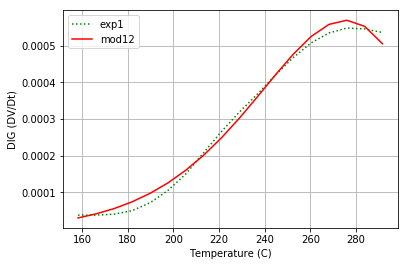

In [10]:
plt.plot(T_c[1:30],r_e(V_e,t)[0],linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c[1:30],r_m(A1,E1,Y1)[2],color = 'r',label='mod12')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()

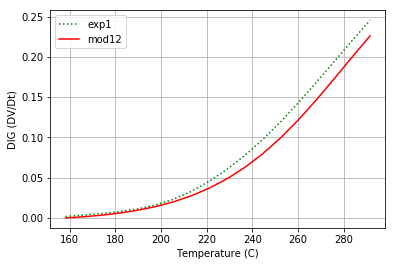

In [11]:
plt.plot(T_c[1:30],V_e[1:30],linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c[1:30],r_m(A1,E1,Y1)[1],color = 'r',label='mod12')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()

In [12]:
wb = load_workbook(r'C:\Users\adam\Desktop\Combustioncode-master\DAEM-Modified.xlsx')
s1 = wb['Fetterbush_dead']
t = get_xcel_col(s1, 'A', 32, 57) #57 41
T_c = get_xcel_col(s1, 'B', 32, 57) #31
T = T_c + np.array(273.15)
m_e = get_xcel_col(s1, 'D', 32, 57)
c = m_e / np.array(s1['D32'].value)
V_e = 1 - c
def r_e(V_e, t):
    dV_e = []
    dt1 = []
    dm_e = []
    for i in range(1, len(V_e)):
        dV_e.append(V_e[i] - V_e[i-1])
        dm_e.append(m_e[i]-m_e[i-1])
    for i in range(1, len(t)):
        dt1.append(t[i] - t[i-1])
    dV_e = np.array(dV_e)
    dm_e = np.array(dm_e)
    dt1 = np.array(dt1)
    r_e = dV_e / dt1
    r_em = dm_e / dt1
    return(r_e, r_em)

In [13]:
A2 = 12000
E2 = 75000
Y2 = .2

def r_m(A2,E2,Y2):
    V = np.zeros(len(t)-1)
    m = np.zeros(len(t)-1)
    dt2 = np.zeros(len(t)-1)
    dV = np.zeros(len(t)-1)
    dm = np.zeros(len(t)-1)
    for i in range(1, len(t)-1):
        dt2[i] = t[i] - t[i-1] 
        
    m[0] = 1
    V[0] = 0
    dm[0] = -(A2*np.exp(-E2/R/T[0]))*m[0]
    dV[0] = (Y2*A2*np.exp(-E2/R/T[0]))*m[0]
    for i in range(1, len(t)-1):
        m[i] = m[i-1]+dm[i-1]*dt2[i]
        dm[i] = -(A2*np.exp(-E2/R/T[i]))*m[i]
        dV[i] = (Y2*A2*np.exp(-E2/R/T[i]))*m[i]
        V[i] = V[i-1]+dV[i-1]*dt2[i]
    return(m, V, dV, dm)
def f(X):
    A2,E2,Y2 = X
    e1 = (r_e(V_e, t)[0]*1000- r_m(A2,E2,Y2)[2]*1000)**2
    e2 = (V_e[0:24] - r_m(A2,E2,Y2)[1])**2
    return(sum(e1)-sum(e2))

res = minimize(f,(A2,E2,Y2))
A2,E2,Y2 = res.x
print(A2)
print(E2)
print(Y2)

12106.330019123294
74619.3595882745
0.3303705126127439


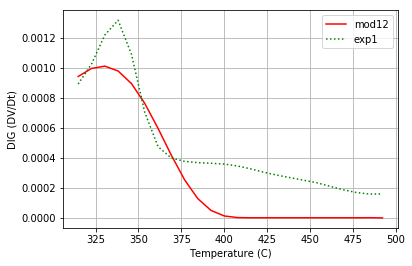

In [14]:
plt.plot(T_c[0:24],r_m(A2,E2,Y2)[2][0:24],color = 'r',label='mod12')
plt.plot(T_c[0:24],r_e(V_e,t)[0][0:24],linestyle = ':',color = 'Green',label='exp1')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()

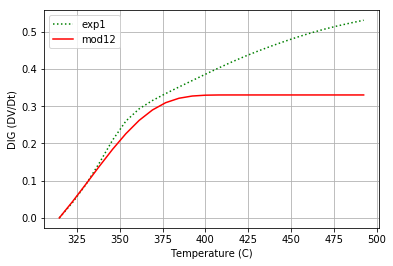

In [15]:
plt.plot(T_c[0:24],V_e[0:24],linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c[0:24],r_m(A2,E2,Y2)[1][0:24],color = 'r',label='mod12')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()

In [17]:
from openpyxl import load_workbook
def get_xcel_col(sheet, col, row_start, row_end):
    vals = []
    
    for i in range(row_start, row_end):
        vals.append(sheet[col+str(i)].value)
    return vals
R = 8.314
wb = load_workbook(r'C:\Users\adam\Desktop\Combustioncode-master\DAEM-Modified.xlsx')
s1 = wb['Fetterbush_dead']
t = get_xcel_col(s1, 'A', 11, 57) #57
T_c = get_xcel_col(s1, 'B', 11, 57)
T = T_c + np.array(273.15)
m_e = get_xcel_col(s1, 'D', 11, 57)
c = m_e / np.array(s1['D11'].value)
V_e = 1 - c
def r_e(V_e, t):
    dV_e = []
    dt1 = []
    dm_e = []
    for i in range(1, len(V_e)):
        dV_e.append(V_e[i] - V_e[i-1])
        dm_e.append(m_e[i]-m_e[i-1])
    for i in range(1, len(t)):
        dt1.append(t[i] - t[i-1])
    dV_e = np.array(dV_e)
    dm_e = np.array(dm_e)
    dt1 = np.array(dt1)
    r_e = dV_e / dt1
    r_em = dm_e / dt1
    return(r_e, r_em)

In [18]:
A1n = 3146
E1n = 60835
Y1n = .3077
A2n = 12104
E2n = 74619
Y2n = 0.331
def nm(A1n,E1n,Y1n):
    V = np.zeros(len(t)-1)
    m = np.zeros(len(t)-1)
    dt2 = np.zeros(len(t)-1)
    dV = np.zeros(len(t)-1)
    dm = np.zeros(len(t)-1)
    for i in range(1, len(t)-1):
        dt2[i] = t[i] - t[i-1] 
        
    m[0] = 1
    V[0] = 0
    dm[0] = -(A1n*np.exp(-E1n/R/T[0]))*m[0]
    dV[0] = (Y1n*A1n*np.exp(-E1n/R/T[0]))*m[0]

    for i in range(1, len(t)-1):
        m[i] = m[i-1]+dm[i-1]*dt2[i]
        dm[i] = -((A1n*np.exp(-E1n/R/T[i])))*m[i]
        dV[i] = ((Y1n*A1n*np.exp(-E1n/R/T[i])))*m[i]   
        V[i] = V[i-1]+dV[i-1]*dt2[i]
    return(m, V, dV, dm)
def nm2(A2n,E2n,Y2n):
    V = np.zeros(len(t)-1)
    m = np.zeros(len(t)-1)
    dt2 = np.zeros(len(t)-1)
    dV = np.zeros(len(t)-1)
    dm = np.zeros(len(t)-1)
    for i in range(1, len(t)-1):
        dt2[i] = t[i] - t[i-1] 
        
    m[0] = 1
    V[0] = 0
    dm[0] = -(A2n*np.exp(-E2n/R/T[0]))*m[0]
    dV[0] = (Y2n*A2n*np.exp(-E2n/R/T[0]))*m[0]

    for i in range(1, len(t)-1):
        m[i] = m[i-1]+dm[i-1]*dt2[i]
        dm[i] = -(A2n*np.exp(-E2n/R/T[i]))*m[i]
        dV[i] = (Y2n*A2n*np.exp(-E2n/R/T[i]))*m[i]   
        V[i] = V[i-1]+dV[i-1]*dt2[i]
    return(m, V, dV, dm)

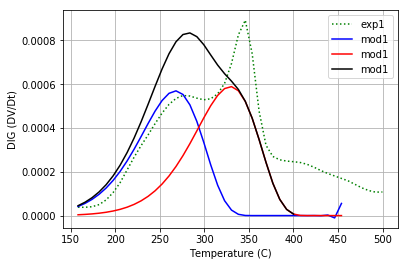

In [19]:
plt.plot(T_c[1:46],r_e(V_e,t)[0],linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c[1:40],nm(A1n,E1n,Y1n)[2][1:40],color = 'blue',label='mod1')
plt.plot(T_c[1:40],nm2(A2n,E2n,Y2n)[2][1:40],color = 'red',label='mod1')
plt.plot(T_c[1:33],nm(A2n,E2n,Y2n)[2][1:33]+nm(A1n,E1n,Y1n)[2][1:33],color = 'black',label='mod1')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()